In [2]:
import numpy as np
from scipy import optimize
from scipy import integrate
from numpy import random
import matplotlib.pyplot as plt

In [3]:
def planck(x):
    return 15/np.pi**4 * x**3/(np.exp(x)-1)


def planckDerivative(x):
    return 15/np.pi**4*x**2 * (3*(np.exp(x)-1)-x*np.exp(x))/(np.exp(x)-1)**2

In [4]:
# Calculating the maximum of the planck distribution
x_max = optimize.brentq(planckDerivative,0.01,10)
y_max = planck(x_max)
print(x_max)
print(y_max)

2.8214393721220787
0.218886470091


In [25]:
# Defining the majorant which is used in b
def majorant(x, x_s, y_max):
    if x <= x_s:
        return y_max
    else:
        return 200 * 15/np.pi**4 *x**(-0.1)*np.exp(-x**(0.9))


# We minimize this function to calculate the intersection
def intersectionFindFunction(x):
    return y_max - 200 * 15/np.pi**4 *x**(-0.1)*np.exp(-x**(0.9))


def CDFMajorant(x, x_s, y_max):
    return integrate.quad(majorant, 0, x)[0]


def inverseCDFOfMajorant(x, x_s, y_max):
    if x <= y_max*x_s:
        return x/y_max
    else:
        return (-np.log((y_max*x_s-x)/(2000/9*15/np.pi**4) + np.exp(-x_s**(9/10))))**(10/9)

In [6]:
# Calculating the intersection of the branches of the majorant
x_s = optimize.brentq(intersectionFindFunction, 4, 12)
print(x_s)

5.678208598337557


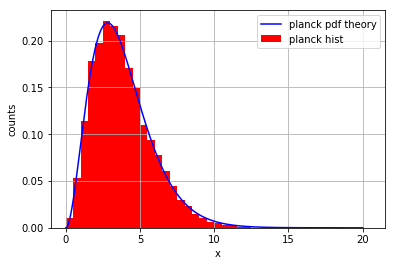

In [26]:
random.seed = 42
x_cut = 20
sampleRejection = []
while(len(sampleRejection) < 1000):
    x = x_cut * random.random() # This generates a random x from 0 to 20, 20 not included
    y = y_max * random.random()
    if y < planck(x):
        sampleRejection.append(x)

sampleImportance = []
while(len(sampleImportance) < 5000):
    x = 1.53*random.random() # This generates a random x from 0 to 20, 20 not included
    y = 1.53*random.random()
    xStrich = inverseCDFOfMajorant(x, x_s, y_max)
    if y < planck(xStrich)/majorant(xStrich, x_s, y_max):
        sampleImportance.append(xStrich)
   # sampleImportance.append(InverseCDFOfMajorant(x, x_s, y_max))
    
plt.hist(sampleImportance, bins=np.arange(start=0, stop=21, step=0.5), normed = True,
         histtype='bar', label='planck hist', color='r')
x_lin = np.linspace(0.001,20,1000)
plt.plot(x_lin, planck(x_lin), 'b-', label='planck pdf theory')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('counts')
plt.show()

In [8]:
# Plotting the cdf
#x_under = np.linspace(0.001,x_s,1000)
#plt.plot(x_under, x_under*y_max, 'b-')
#x_over = np.linspace(x_s,20,1000)
#plt.plot(x_over, y_max*x_s-2000/9*15/np.pi**4*(np.exp(-x_over**(9/10))-np.exp(-x_s**(9/10))), 'b-')
#plt.plot(x_lin, CDFMajorant(x_lin, x_s, y_max))
#plt.grid()
#plt.xlabel('x')
#plt.ylabel('counts')
#plt.show()